# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an Dataframe and a degree and return an Dataframe where each column is the Array to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the Array column 2 is the numpyArray squared and column 3 is the numpyArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

In [27]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import LinearRegression
desired_width = 360
pd.set_option('display.width', desired_width)

from IPython.display import display, HTML
import datetime

display(HTML(data="""
<style>
    div#notebook-container    { width: 100%; }
</style>
"""))
plt.rcParams['figure.figsize'] = [16,4]

ImportError: cannot import name 'LinearRegression'

In [ ]:
trainDt = pd.read_csv('wk3_kc_house_train_data.csv')
validDt = pd.read_csv('wk3_kc_house_valid_data.csv')
testDt = pd.read_csv('wk3_kc_house_test_data.csv')
trainDt = trainDt.sort_values(by= ['sqft_living','price'])
validDt = validDt.sort_values(by= ['sqft_living','price'])
testDt = testDt.sort_values(by= ['sqft_living','price'])
trainDt = trainDt.reset_index(drop = True)
validDt = validDt.reset_index(drop = True)
testDt = testDt.reset_index(drop = True)
trainDt.sqft_living = trainDt.sqft_living.apply(lambda x: float(x))
validDt.sqft_living = validDt.sqft_living.apply(lambda x: float(x))
testDt.sqft_living = testDt.sqft_living.apply(lambda x: float(x))

len(trainDt), len(testDt)

# Polynomial_Dataframe function


In [28]:
def polynomial_dframe(feature_dt, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_dframe = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_dframe['power_1'] = feature_dt

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_dframe[name] = feature_dt**power

    return poly_dframe

In [29]:
a = pd.Series([1,2,3,4])

In [30]:
a**3

0     1
1     8
2    27
3    64
dtype: int64

In [31]:
### To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:
print (polynomial_dframe(a, 3))

   power_1  power_2  power_3
0        1        1        1
1        2        4        8
2        3        9       27
3        4       16       64


# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [32]:
### Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.
trainDt = trainDt.sort_values(by= ['sqft_living','price'])
testDt = testDt.sort_values(by= ['sqft_living','price'])
poly1_data = polynomial_dframe(trainDt['sqft_living'], 1)
poly1_out = trainDt['price'] # add price to the data since it's the target

In [33]:
regr = LinearRegression()
regr.fit(poly1_data, poly1_out)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
regr.coef_

array([288.59846375])

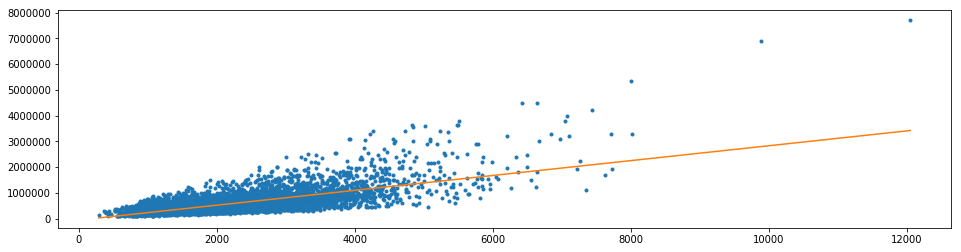

In [35]:
plt.plot(poly1_data['power_1'],poly1_out,'.',
        poly1_data['power_1'], regr.predict(poly1_data),'-');

In [36]:
regr.predict(pd.DataFrame([0]))

array([-59493.31716521])

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [37]:
regr2 = LinearRegression()
poly2_data = polynomial_dframe(trainDt['sqft_living'], 2)
poly2_out = trainDt['price'] # add price to the data since it's the target
model2 =regr2.fit(poly2_data, poly2_out)

In [38]:
regr2.coef_

array([1.22673842, 0.0522949 ])

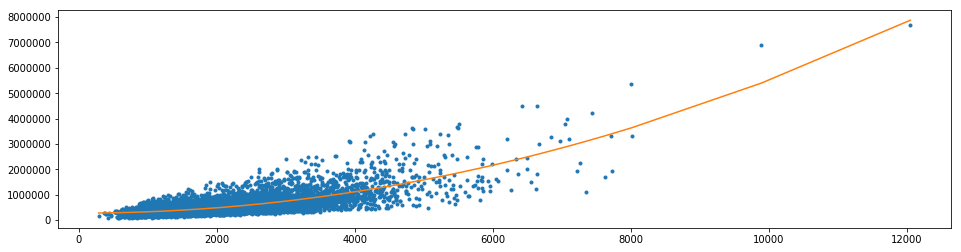

In [39]:
a1, a2 = regr2.coef_
plt.plot(poly2_data['power_1'],poly2_out,'.',
        poly2_data['power_1'], regr2.predict(poly2_data),'-');

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [40]:
regr3 = LinearRegression()
poly3_data = polynomial_dframe(trainDt['sqft_living'], 3)
poly3_out = trainDt['price'] # add price to the data since it's the target
model3 =regr3.fit(poly3_data, poly3_out)

In [41]:
poly3_data.head()

,power_1,power_2,power_3
0,290.0,84100.0,24389000.0
1,370.0,136900.0,50653000.0
2,384.0,147456.0,56623104.0
3,390.0,152100.0,59319000.0
4,390.0,152100.0,59319000.0


In [42]:
poly3_datat = polynomial_dframe(testDt['sqft_living'], 3)

In [43]:
regr3.coef_

array([7.50292074e+00, 5.03063603e-02, 1.67090667e-07])

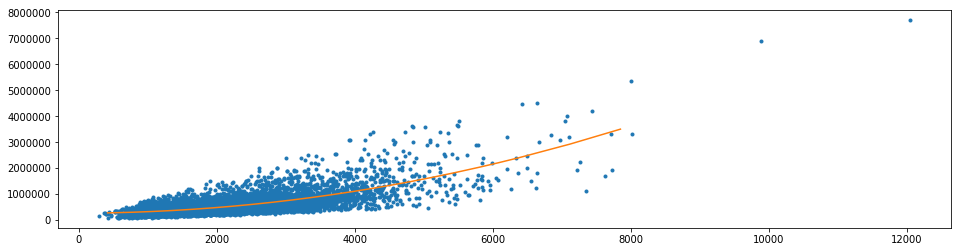

In [44]:
plt.plot(poly3_data['power_1'],poly3_out,'.',
        poly3_datat['power_1'], regr3.predict(poly3_datat),'-');

In [45]:
regr3.predict(poly3_datat)

array([ 274208.29641816,  281542.72844339,  282177.70233488, ...,
       2401121.95045562, 2926152.59058576, 3501900.13894679])

Now try a 15th degree polynomial:

In [46]:
regr15 = LinearRegression()
poly15_data = polynomial_dframe(trainDt['sqft_living'], 15)
poly15_out = trainDt['price'] # add price to the data since it's the target
model15 =regr15.fit(poly15_data, poly15_out)

In [47]:
regr15.coef_

array([ 3.65649652e-89,  3.44808614e-49, -6.64641016e-55, -1.99136489e-59,
        3.04293598e-73,  8.36182560e-70,  5.73133489e-66,  3.83786524e-62,
        2.47884969e-58,  1.51269750e-54,  8.40594099e-51,  3.93663091e-47,
        1.24240972e-43, -2.25041880e-47,  1.01236550e-51])

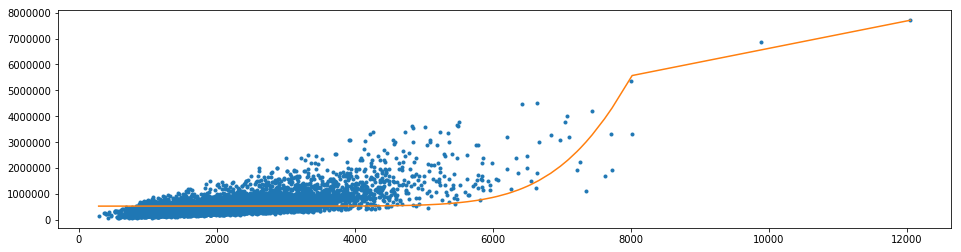

In [48]:
plt.plot(poly15_data['power_1'],poly15_out,'.',
        poly15_data['power_1'], regr15.predict(poly15_data),'-');

In [49]:
regr7 = LinearRegression()
poly7_data = polynomial_dframe(trainDt['sqft_living'], 7)
poly7_out = trainDt['price'] # add price to the data since it's the target
model7 =regr7.fit(poly7_data, poly7_out)

In [50]:
regr7.coef_

array([ 8.80209506e-19, -5.51993904e-12,  8.65340778e-12,  1.40282497e-08,
       -4.30479844e-12,  4.64796044e-16, -1.67447722e-20])

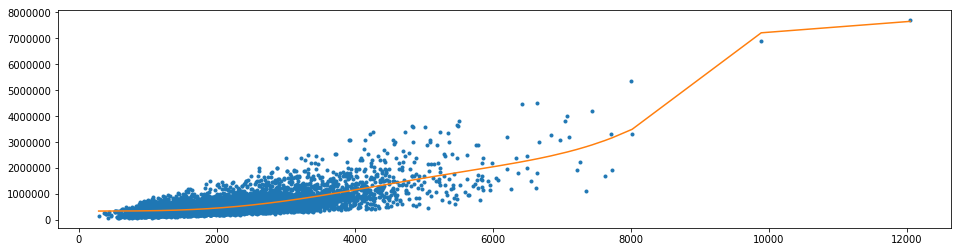

In [51]:
plt.plot(poly7_data['power_1'],poly7_out,'.',
        poly7_data['power_1'], regr7.predict(poly7_data),'-');

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

In [52]:
testDt1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
testDt2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
testDt3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
testDt4 = pd.read_csv('wk3_kc_house_set_4_data.csv')
#testDt = pd.read_csv('kc_house_data.csv')
testDt1.sqft_living = testDt1.sqft_living.apply(lambda x: float(x))
testDt2.sqft_living = testDt2.sqft_living.apply(lambda x: float(x))
testDt3.sqft_living = testDt3.sqft_living.apply(lambda x: float(x))

In [53]:
regr15_1= LinearRegression()
regr15_1.fit(polynomial_dframe(testDt1['sqft_living'], 15), testDt1['price'])
regr15_2= LinearRegression()
regr15_2.fit(polynomial_dframe(testDt2['sqft_living'], 15), testDt2['price'])
regr15_3= LinearRegression()
regr15_3.fit(polynomial_dframe(testDt3['sqft_living'], 15), testDt3['price'])
regr15_4= LinearRegression()
regr15_4.fit(polynomial_dframe(testDt4['sqft_living'], 15), testDt4['price'])


predict1 = regr15_1.predict(polynomial_dframe(testDt1['sqft_living'], 15))
predict2 = regr15_2.predict(polynomial_dframe(testDt2['sqft_living'], 15))
predict3 = regr15_3.predict(polynomial_dframe(testDt3['sqft_living'], 15))
predict4 = regr15_4.predict(polynomial_dframe(testDt4['sqft_living'], 15))

In [54]:
type(testDt1['sqft_living'][0])

numpy.float64

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

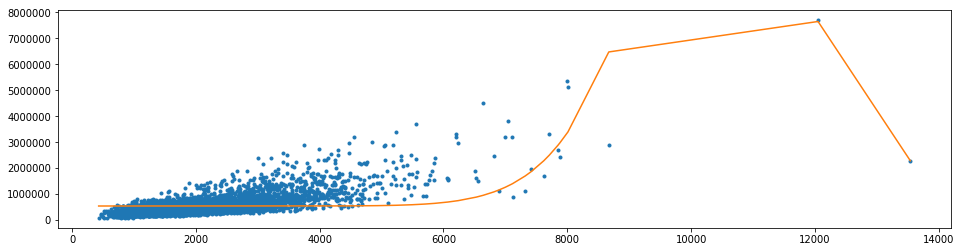

In [55]:
testDt1 = testDt1.sort_values(by= ['sqft_living','price'])
plt.plot(testDt1['sqft_living'],testDt1['price'],'.',
         testDt1['sqft_living'], predict1,'-');

In [56]:
regr15_1.coef_


array([ 3.05794168e-90,  2.21229711e-49,  6.60361724e-55, -4.97841222e-60,
        3.23082736e-74,  1.10358333e-70,  8.37724029e-67,  6.23411957e-63,
        4.49156442e-59,  3.06938763e-55,  1.91749300e-51,  1.01335180e-47,
        3.62176959e-44, -5.63501661e-48,  2.18641116e-52])

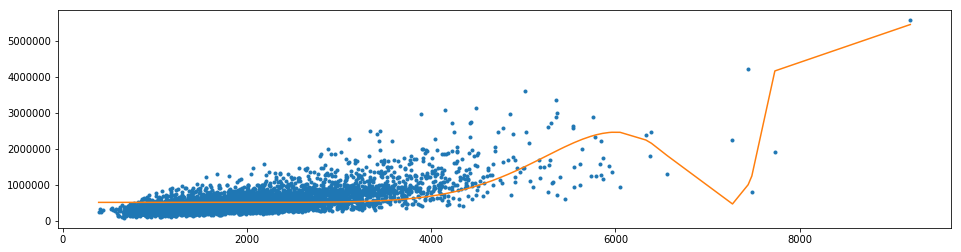

In [57]:
testDt2 = testDt2.sort_values(by= ['sqft_living','price'])
plt.plot(testDt2['sqft_living'],testDt2['price'],'.', 
         testDt2['sqft_living'], predict2,'-');

In [58]:
regr15_2.coef_

array([ 2.69062833e-77, -4.25460846e-39, -1.49051228e-44,  2.27069031e-49,
        5.69833941e-71,  1.52836072e-58,  3.62461990e-55,  1.49667048e-51,
        5.73503038e-48,  1.95015183e-44,  5.37537379e-41,  9.37452621e-38,
       -3.62324584e-41,  4.63847479e-45, -1.96476265e-49])

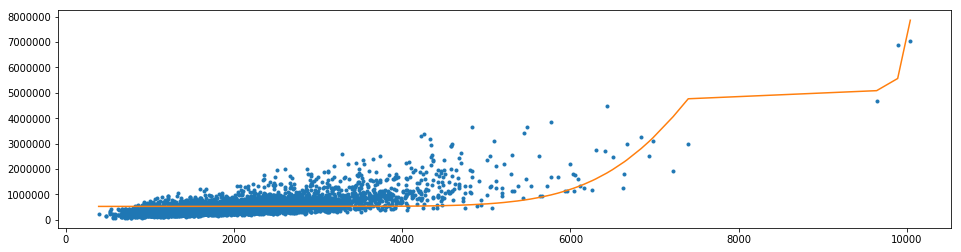

In [59]:
testDt3 = testDt3.sort_values(by= ['sqft_living','price'])
plt.plot(testDt3['sqft_living'],testDt3['price'],'.', 
         testDt3['sqft_living'], predict3,'-');

In [60]:
regr15_3.coef_

array([ 2.83751934e-88, -3.80811571e-49, -2.99948678e-55, -3.98272978e-59,
        1.57170169e-72,  4.27894908e-69,  2.68009626e-65,  1.63911362e-61,
        9.66435015e-58,  5.38044653e-54,  2.72563636e-50,  1.16253248e-46,
        3.33756141e-43, -6.76238818e-47,  3.43132932e-51])

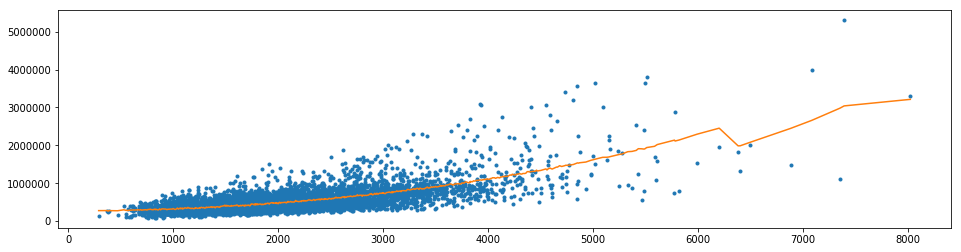

In [61]:
testDt4 = testDt4.sort_values(by= ['sqft_living','price'])
plt.plot(testDt4['sqft_living'],testDt4['price'],'.', 
         testDt4['sqft_living'], predict4,'-');

In [62]:
regr15_4.coef_

array([ 2.91884329e-05,  5.46724867e-02, -1.39708390e-06,  6.93849733e-11,
        3.46250806e-14, -1.22818422e-15, -4.00721123e-16,  9.03790931e-16,
       -4.90926744e-16, -5.45570533e-16,  2.77555756e-16,  3.98119038e-16,
        2.82759927e-16, -1.03562992e-15, -3.19189120e-16])

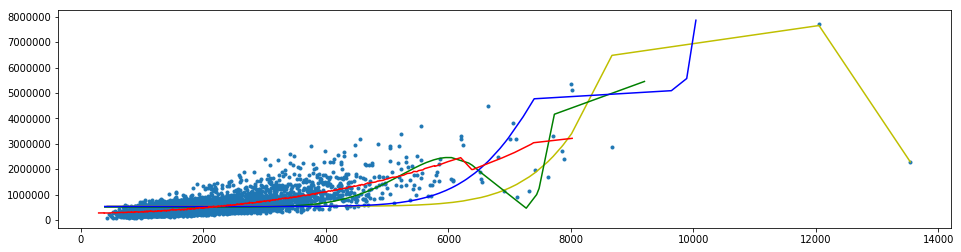

In [63]:
plt.plot(testDt1['sqft_living'],testDt1['price'],'.',
         testDt1['sqft_living'], predict1,'y-',
         testDt2['sqft_living'], predict2,'g-',
         testDt3['sqft_living'], predict3,'b-',
         testDt4['sqft_living'], predict4,'r-');

Some questions you will be asked on your quiz:

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**

**Quiz Question: (True/False) the plotted fitted lines look the same in all four plots**

# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users.

In [64]:
RSS1 = sum((testDt1['price'] - predict1)**2)
RSS1

697360149559872.6

In [65]:
RSS2 = sum((testDt2['price'] - predict2)**2)
RSS2

470064935459943.75

In [41]:
RSS3 = sum((testDt3['price'] - predict3)**2)
RSS3

623393088762262.6

In [42]:
RSS4 = sum((testDt4['price'] - predict4)**2)
RSS4

325799514887730.6

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

In [43]:
rsstest_lst = []
rsstrain_lst = []
regri = LinearRegression()
for i in range(1,16):
    ### Learning on 'training Data'
    regri.fit(polynomial_dframe(trainDt['sqft_living'], i), trainDt['price']) 
    
    ### Testing on train Data 
    predicttrain = regri.predict(polynomial_dframe(trainDt['sqft_living'], i))
    
    ### Testing on Valid Data 
    predicttest = regri.predict(polynomial_dframe(validDt['sqft_living'], i))
    
    RSStest = sum((validDt['price'] - predicttest)**2)
    RSStrain = sum((trainDt['price'] - predicttrain)**2)
    
    print (i, RSStrain, " ******* ", RSStest)
    rsstrain_lst.append(RSStrain)
    rsstest_lst.append(RSStest)
rsstest_lst = np.array(rsstest_lst)/1e13
rsstrain_lst = np.array(rsstrain_lst)/1e13

1 706999812596191.9  *******  629097886299586.2
2 617681432824603.5  *******  623955062706519.0
3 617670141211081.2  *******  625820280251936.2
4 617637641573565.1  *******  629987335742093.8
5 617649100671121.9  *******  628224826839623.4
6 616209024627037.4  *******  566268534827871.5
7 617631990816581.6  *******  1073848076155138.9
8 637786818757332.4  *******  7088062454147649.0
9 684831094496451.4  *******  4.528864599706442e+16
10 751989757588501.2  *******  2.472550208062813e+17
11 826194988565814.2  *******  1.1729780579707886e+18
12 896930656375144.8  *******  5.257250464333601e+18
13 1143335158761443.8  *******  7.616230021235547e+17
14 1166042749408686.8  *******  2.2975609250815263e+18
15 1183400438743908.2  *******  6.955038098435974e+18


In [44]:
2**5

32

In [49]:
rsstest_lst.min(), rsstest_lst.argmin()

(56.62685348278715, 5)

C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\axes\_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


(56.62685348278715, 10000.0)

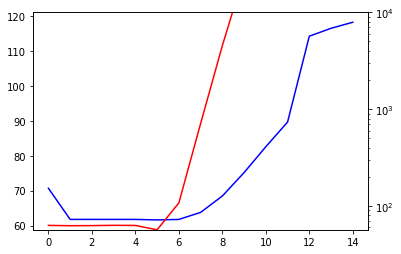

In [52]:
plt.plot(rsstrain_lst, 'b-')
plt.twinx()
plt.plot(rsstest_lst,  'r-')
plt.semilogy()
plt.ylim(0,10e3)

**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data. Report the RSS on your quiz.



**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?**

In [53]:
regri.fit(polynomial_dframe(trainDt['sqft_living'], 6), trainDt['price'])
predict = regri.predict(polynomial_dframe(testDt['sqft_living'], 6))
RSS = sum((testDt['price'] - predict)**2)
RSS

135225115616415.48

In [54]:
polynomial_dframe(testDt['sqft_living'], 2)

,power_1,power_2
0,420.0,176400.0
1,550.0,302500.0
2,560.0,313600.0
3,600.0,360000.0
4,620.0,384400.0
5,620.0,384400.0
6,700.0,490000.0
7,700.0,490000.0
8,710.0,504100.0
9,710.0,504100.0
